# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t

df = pd.read_csv('data/human_body_temperature.csv')


C:\Users\Taylor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


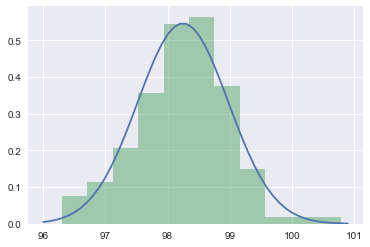

In [2]:
### 1. Check the normality of the distribution of body temperatures

sns.set()

x = np.arange(96,101,0.1)

_ = plt.plot(x, norm.pdf(x,np.mean(df['temperature']), np.std(df['temperature'])))

_ = plt.hist(x = 'temperature', data = df, bins=int(np.sqrt(len(df))), alpha=0.5, normed=True)





+ Here I have plotted the normalized distribution of body temperatures against the pdf of the normal distribution with the same mean and standard deviation. The temperature dataset appears to be more-or-less normally distributed. 

In [3]:
### 2. Is the sample size large? Are the observations independent?

print('The sample size is:', len(df['temperature']))

The sample size is: 130


## Is the sample size large? Are the observations independent?

+ For this sample, we can see that the sample size is greater than 30, so it is sufficiently large to meet the size requirement of the Central Limit theorem

+ Since the sample size, 130, is well below 10% of the total population size, we can assume that temperature observations are independent.

In [4]:
### 3. Bootstrap hypothesis test

# Define the function bootstrap_replicate_1d, which computes a boostrap replicate from a 1-dimensional dataset.

def bootstrap_replicate_1d(data, func):
    
    return func(np.random.choice(data, size=len(data)))

# Define the function draw_bs_reps to compute multiple bootstrap replicates from sample data.

def draw_bs_reps(data, func, size=1):

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Store the temperature column in an array and translate the temperature dataset so that its mean is 98.6

temps = np.array(df['temperature'])

translated_temps = temps - np.mean(temps) + 98.6

# Draw 10,000 bootstrap replicates for the sample mean of the translated temperature data

temp_replicates = draw_bs_reps(translated_temps, np.mean, 10000)

# Compute the p-value

p = np.sum(temp_replicates <= np.mean(temps)) / len(temp_replicates)

print('The p-value is:', p)

The p-value is: 0.0


## Analysis of bootstrap hypothesis test

+ We were testing the null hypothesis that the true population mean is 98.6. The bootstrap hypothesis test yielded a p-value of 0, which is statistically significant. We have sufficient evidence the reject the null hypothesis, and claim that the true population mean is different than 98.6.

In [5]:
### 3. One sample frequentist statistical test

# Calculate the test statistic.

t_temps = (np.mean(temps) - 98.6) / (np.std(temps) / np.sqrt(130))

# Calculate the two-tailed p-value using this test statistic and 129 degrees of freedom

p = 2 * t.sf(abs(t_temps), 129)

print('The p-value is:', p)

The p-value is: 2.1887464624050777e-07


## Analysis of one-sample t-test

+ Here we use a one-sample t-test. We use a one sample test because we only have the dataset for these 130 persons, which we will compare against a hypothesized population mean, 98.6. 

+ We use a t-test, because although n is sufficiently large, we are unaware of the population standard deviation.

In [6]:
### 3. Same one sample test, this time with a z-value

# Calculate the test statistic.

z_temps = (np.mean(temps) - 98.6) / (np.std(temps) / np.sqrt(130))

# Calculate the two-tailed p-value using this test statistic and 129 degrees of freedom

p = 2 * norm.sf(abs(z_temps))

print('The p-value is:', p)

The p-value is: 4.3523151658713056e-08


## Analysis of one sample z-test

+ Upon using a z test statistic instead, we notice an even smaller p value. By nature, the t test statistic assumes no knowledge of the population standard deviation, and so we use the sample standard deviation as an estimate. As such, the t distribution provides greater leeway for variability between the sample mean and the hypothesized population mean. Thus, the p-value for the t-test will be larger, making it more difficult to reject the null hypothesis.

In [7]:
### 4. Repeat the above frequentist statiscal tests, this time with a sample size of 10.

# Draw a random sample of size 10 from the data.

temps_small = np.random.choice(temps, replace=False, size=10)

# Compute the t and z test statistics

t_temps_small = (np.mean(temps_small) - 98.6) / (np.std(temps_small) / np.sqrt(10))

z_temps_small = (np.mean(temps_small) - 98.6) / (np.std(temps_small) / np.sqrt(10))

# Calculate the two-tailed p-values for the t test statistic and the z test statistic, respectively.

p_t = 2 * t.sf(abs(t_temps_small), 9)

p_z = 2 * norm.sf(abs(z_temps_small))

print('The p-value for the t test statistic is:', p_t)
print('The p-value for the z test statistic is:', p_z)

The p-value for the t test statistic is: 0.09054109827609624
The p-value for the z test statistic is: 0.05802988846197854


## Analysis of z-test vs. t-test for n=10

+ Here we see a more substantial difference between the two p-values. The p-value for the t-test is much larger (about 0.03). As n becomes smaller, it is more and more likely that the sample mean will stray further from the population mean. For the reasons described above, the t test statistic will tend to return larger p-values, making it harder for us to reject the null hypothesis. Therefore, when there is a greater degree of uncertainty in our analysis, i.e. a small sample size and lack of the population standard deviation, it is appropriate to use the t-test, to appropriately force greater difficulty on our rejection of the null hypothesis.

In [8]:
### 5. Bootstrap confidence interval

# Draw 10000 bootstrap replicates of the sample mean of the temperatures.

bs_reps_temps = draw_bs_reps(temps,np.mean,10000)

temps_interval = np.percentile(bs_reps_temps, [2.5, 97.5])

print('The bootstrap confidence interval for mean temperature is:', temps_interval)

The bootstrap confidence interval for mean temperature is: [98.12461538 98.37384615]


In [9]:
### 5. Frequentist confidence interval

critical_t = t.ppf(.975, 129)

margin_of_error = critical_t * (np.std(temps) / np.sqrt(130))

confidence_interval_low = np.mean(temps) - margin_of_error
confidence_interval_high = np.mean(temps) + margin_of_error

confidence_interval = [confidence_interval_low, confidence_interval_high]

print('The frequentist confidence interval for mean temperature is:', confidence_interval)



The frequentist confidence interval for mean temperature is: [98.12249318821638, 98.37596835024512]


## Analysis of confidence interval for mean body temperature

+ In general, it would appear that we would consider a body temperature below 98.122 or above 98.376 as abnormal.

In [10]:
### 6. Is there a difference between males and females in terms of normal body temperature?

# Separate males and females into separate dataframes

df_males = df[df['gender']=='M']
df_females = df[df['gender']=='F']

# Create arrays for the male temperatures and female temperatures

temps_male = np.array(df_males['temperature'])
temps_female = np.array(df_females['temperature'])

# Create function for computing permutation samples

def permutation_sample(data1, data2):

    data = np.concatenate((data1, data2))

    permuted_data = np.random.permutation(data)

    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Create a function for computing multiple permutation replicates

def draw_perm_reps(data_1, data_2, func, size=1):

    perm_replicates = np.empty(size)

    for i in range(size):

        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Create a function for finding the difference in means between two datasets

def diff_of_means(data_1, data_2):

    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Draw 10000 permutation replicates of the difference in sample means

perm_reps = draw_perm_reps(temps_male, temps_female, diff_of_means, 10000)

# Compute the p-value

p = np.sum(perm_reps <= np.mean(temps_male) - np.mean(temps_female))/len(perm_reps)

print('The p-value is:' , p)

The p-value is: 0.0106


## Analysis of permutation test on difference in male and female temperature distributions

+ We were testing the hypothesis that male and female body temperatures are identically distributed. To do this, we use a permutation test, which assumes no difference in the two distributions before computing the test statistic. We used the difference in sample means as our test statistic. 

+ Assuming the null hypothesis is true, we determined that there was approximately a 1.12% chance of observing the empirical difference in means (or more extreme), if the distributions were identical. This is a statistically significant p-value, and so we can conclude that there is a difference in the distributions of body temperatures for males and females.